In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_positions = 50
depth = 512
min_rate = 1/10000

assert depth%2 == 0, "Depth must be even."
angle_rate_exponents = np.linspace(0,1,depth//2)
angle_rates = min_rate**(angle_rate_exponents)

Text(0, 0.5, 'Angle rate [rads/step]')

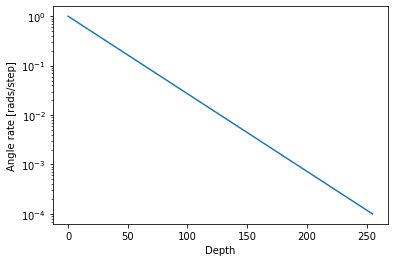

In [3]:
plt.semilogy(angle_rates)
plt.xlabel('Depth')
plt.ylabel('Angle rate [rads/step]')

In [4]:
positions = np.arange(num_positions) 
angle_rads = (positions[:, np.newaxis])*angle_rates[np.newaxis, :]

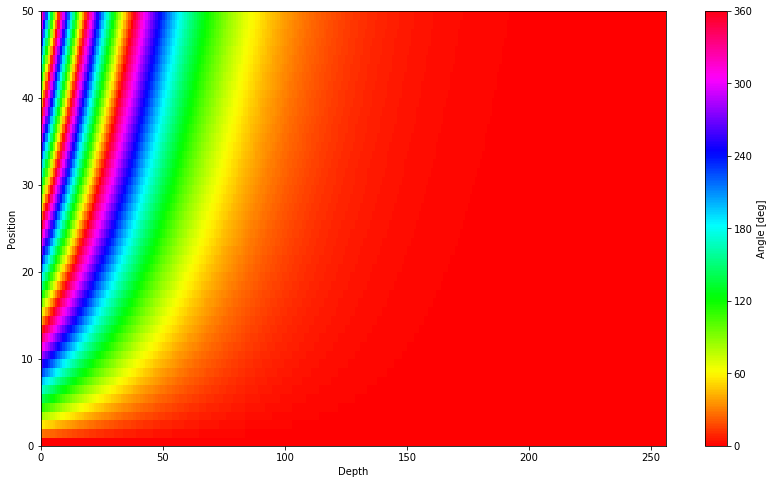

In [5]:
plt.figure(figsize = (14,8))
plt.pcolormesh(
    # Convert to degrees, and wrap around at 360
    angle_rads*180/(2*np.pi) % 360,
    # Use a cyclical colormap so that color(0) == color(360)
    cmap='hsv', vmin=0, vmax=360)

plt.xlim([0,len(angle_rates)])
plt.ylabel('Position')
plt.xlabel('Depth')
bar = plt.colorbar(label='Angle [deg]')
bar.set_ticks(np.linspace(0,360,6+1))

In [6]:
sines = np.sin(angle_rads)
cosines = np.cos(angle_rads)
pos_encoding = np.concatenate([sines, cosines], axis=-1)

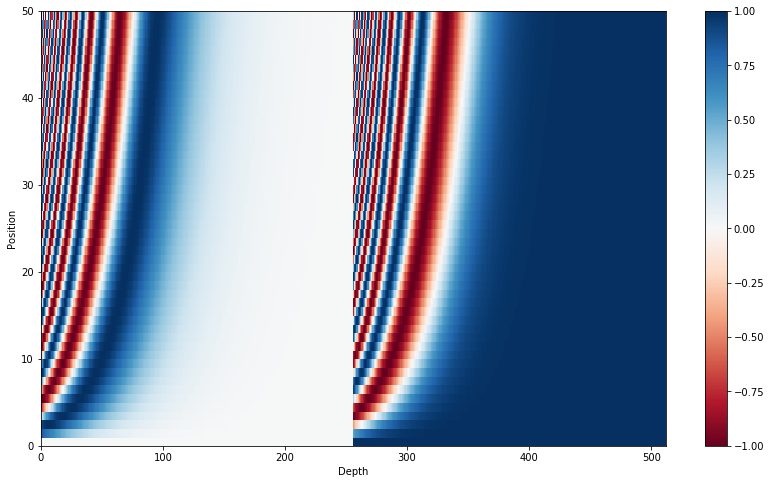

In [7]:
plt.figure(figsize=(14,8))
plt.pcolormesh(pos_encoding, 
               # Use a diverging colormap so it's clear where zero is.
               cmap='RdBu', vmin=-1, vmax=1)
plt.xlim([0,depth])
plt.ylabel('Position')
plt.xlabel('Depth')
plt.colorbar()

In [18]:
pos_encoding_at_20 = pos_encoding[20]

dots = np.dot(pos_encoding, pos_encoding_at_20)
SSE = np.sum((pos_encoding - pos_encoding_at_20)**2, axis=1)

Text(0.5, 0, 'Position')

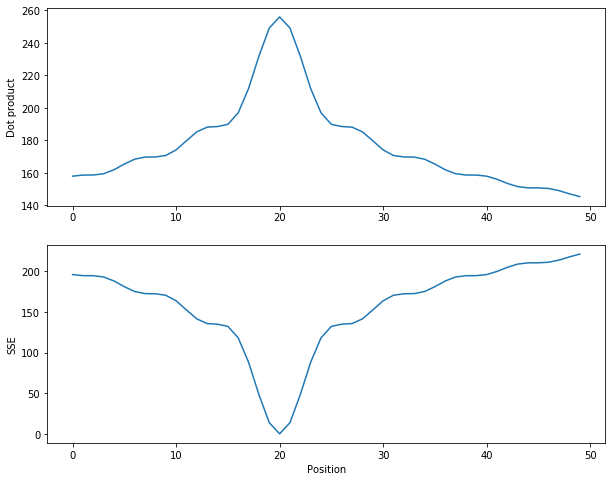

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(dots)
plt.ylabel('Dot product')
plt.subplot(2,1,2)
plt.plot(SSE)
plt.ylabel('SSE')
plt.xlabel('Position')

In [10]:
def transition_matrix(position_delta, angle_rates = angle_rates):
    # Implement as a matrix multiply:
    #    sin(a+b) = sin(a)*cos(b)+cos(a)*sin(b)
    #    cos(a+b) = cos(a)*cos(b)-sin(a)*sin(b)

    # b
    angle_delta = position_delta*angle_rates

    # sin(b), cos(b)
    sin_delta = np.sin(angle_delta)
    cos_delta = np.cos(angle_delta)

    I = np.eye(len(angle_rates))

    # sin(a+b) = sin(a)*cos(b)+cos(a)*sin(b)
    update_sin = np.concatenate([I*cos_delta, I*sin_delta], axis=0)

    # cos(a+b) = cos(a)*cos(b)-sin(a)*sin(b)
    update_cos = np.concatenate([-I*sin_delta, I*cos_delta], axis=0)

    return np.concatenate([update_sin, update_cos], axis=-1)

In [11]:
position_delta = -10
update = transition_matrix(position_delta)

Text(0.5, 0, 'Depth')

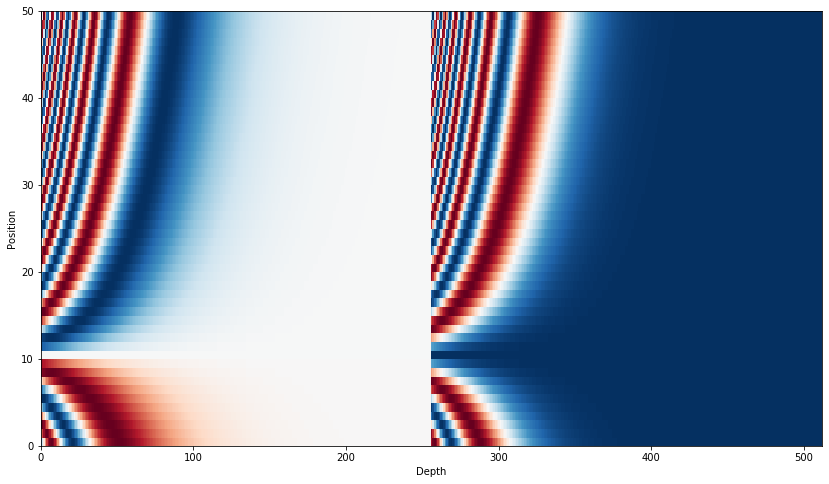

In [12]:
plt.figure(figsize=(14,8))
plt.pcolormesh(np.dot(pos_encoding,update), cmap='RdBu', vmin=-1, vmax=1)
plt.xlim([0,depth])
plt.ylabel('Position')
plt.xlabel('Depth')

Text(0.5, 0, 'Depth')

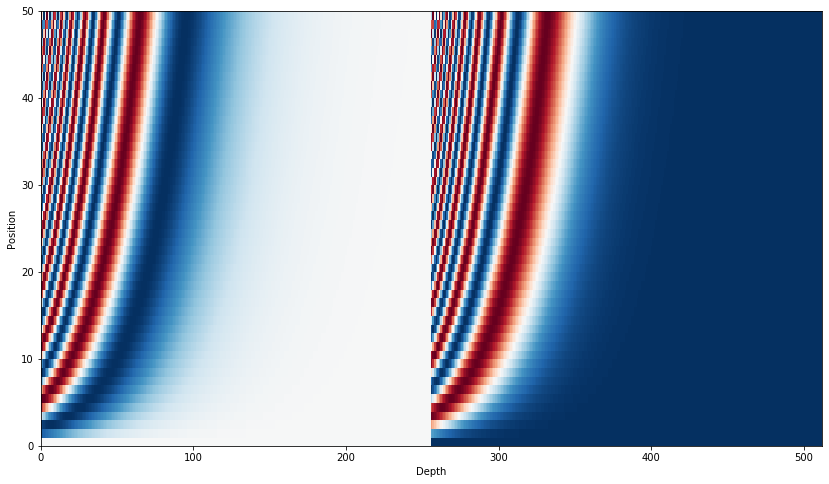

In [19]:
plt.figure(figsize=(14,8))
plt.pcolormesh(pos_encoding, cmap='RdBu', vmin=-1, vmax=1)
plt.xlim([0,depth])
plt.ylabel('Position')
plt.xlabel('Depth')

Text(0.5, 0, 'Depth')

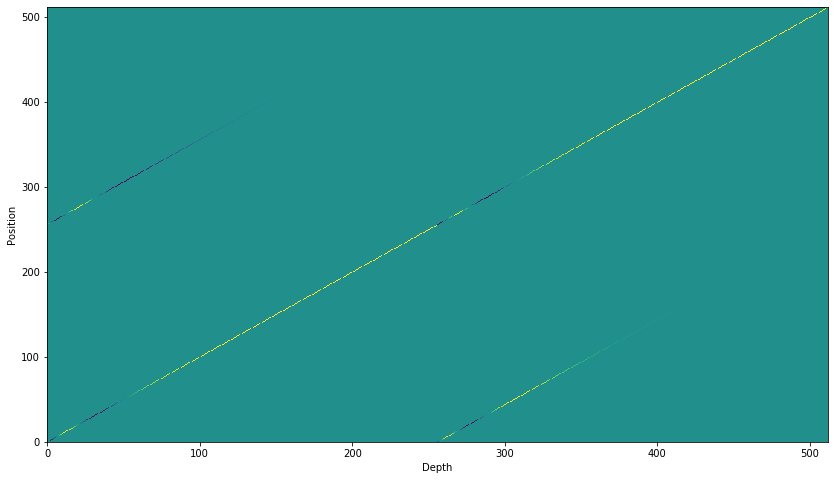

In [22]:
plt.figure(figsize=(14,8))
plt.pcolormesh(update)
plt.xlim([0,depth])
plt.ylabel('Position')
plt.xlabel('Depth')

In [13]:
errors = np.dot(pos_encoding,update)[10:] - pos_encoding[:-10]
abs(errors).max()

5.4262150328554526e-15